# AMAZON DELIVERY EDA PROJECT

## Introduction
This dataset captures detailed information about deliveries carried out by Amazon delivery agents. Each row in the dataset represents a unique delivery, recording critical information related to delivery agents, delivery locations, operational conditions, and product-specific details. The data is structured to provide insights into the efficiency and performance of Amazon's delivery system under varying conditions.


Import all libraries that is needed for the project

In [24]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Import the dataframe using read_csv()

In [25]:
df = pd.read_csv(r"F:\DATAANALYTICS\PROJECT\amazon_delivery.csv")

Analyzing dataframe by taking a sample data to get an overview of the overroll dataframe.
first 10 rows is taken using head() and last 10 rows using tail()

In [26]:
print(df.head(10))

        Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  zguw716275638         32           4.6       12.972793        80.249982   
5  fxuu788413734         22           4.8       17.431668        78.408321   
6  njmo150975311         33           4.7       23.369746        85.339820   
7  jvjc772545076         35           4.6       12.352058        76.606650   
8  uaeb808891380         22           4.8       17.433809        78.386744   
9  bgvc052754213         36           4.2       30.327968        78.046106   

   Drop_Latitude  Drop_Longitude  Order_Date Order_Time Pickup_Time  \
0      22.765049       75.912471  2022-03-19   11:30:00    11:45:00   

In [27]:
print(df.tail(10))

            Order_ID  Agent_Age  Agent_Rating  Store_Latitude  \
43729  llbw528617620         36           4.8       12.310972   
43730  spgc082793916         37           4.8       13.022394   
43731  cuqm879666070         30           4.2       26.469003   
43732  uftb261665932         28           4.9       13.029198   
43733  gcxb277393192         35           4.2       23.371292   
43734  jlxf819993117         30           4.8       26.902328   
43735  aevx342135787         21           4.6        0.000000   
43736  xnek760674819         30           4.9       13.022394   
43737  cynl434665991         20           4.7       11.001753   
43738  nsyz997960170         23           4.9       23.351058   

       Store_Longitude  Drop_Latitude  Drop_Longitude  Order_Date Order_Time  \
43729        76.659264      12.440972       76.789264  2022-03-18   21:10:00   
43730        80.242439      13.042394       80.262439  2022-04-05   09:35:00   
43731        80.316344      26.539003       

To take all informations  about dataframe use .info() .This info will will contain no. of columns,rows,its DT,column name etc

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB
N

## Data Cleaning & Analysis

To see if there is any null cells in the dataframe use .isna()

In [30]:
print(df.isna().sum())



Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64


To drop all null cells use dropna()

In [31]:
df = df.dropna()

Changing Datatype of the column


In [32]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Time'] = pd.to_datetime(df['Order_Time'])
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9820\2671187606.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Time'] = pd.to_datetime(df['Order_Time'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9820\2671187606.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'])


Drop all unnessecary columns using drop()

In [33]:
df=df.drop(columns=["Store_Latitude","Store_Longitude","Drop_Latitude","Drop_Longitude"],axis=1)

Checking if duplicate values are in the dataframe using duplicated()

In [34]:
print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
43734    False
43735    False
43736    False
43737    False
43738    False
Length: 43594, dtype: bool


Droping duplicate values if there is any using drop_duplicates()

In [35]:
df = df.drop_duplicates()

ploting a box plot to find if tere is any outlayers in the dataframe

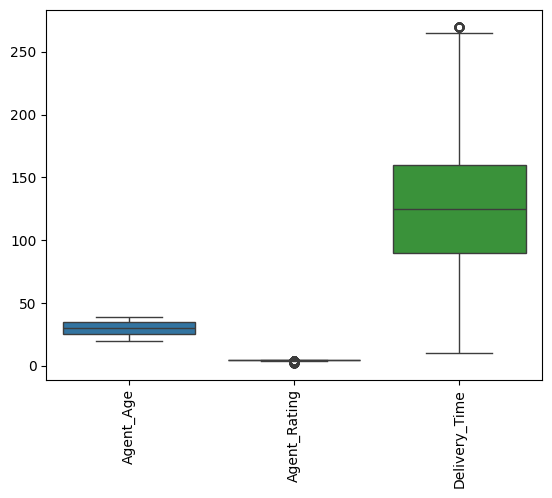

In [11]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

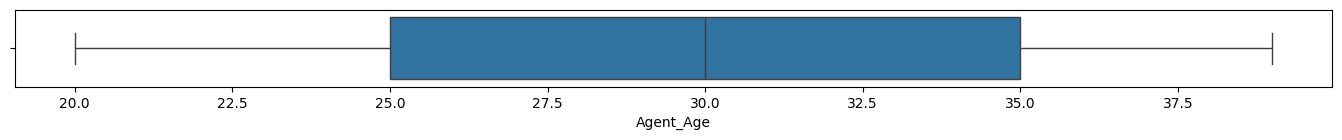

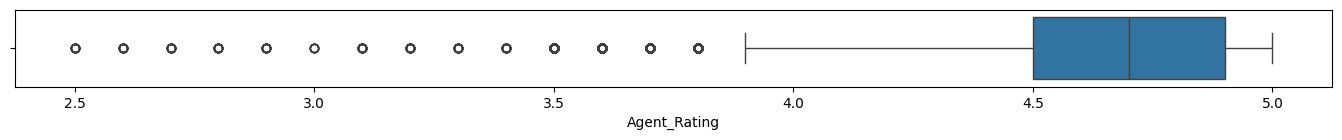

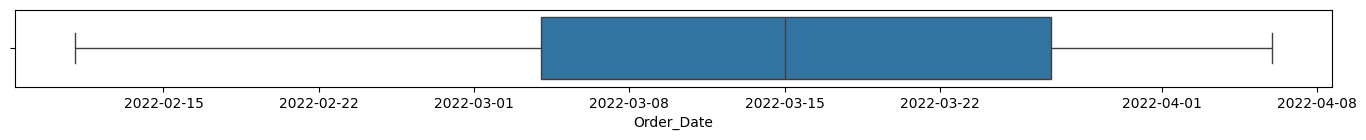

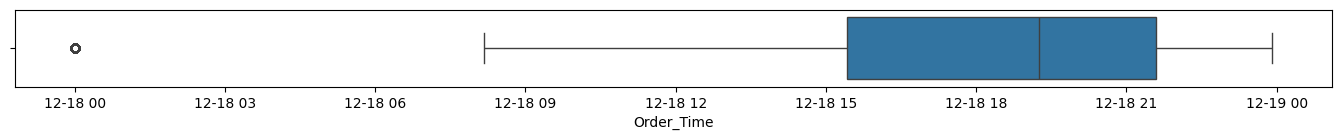

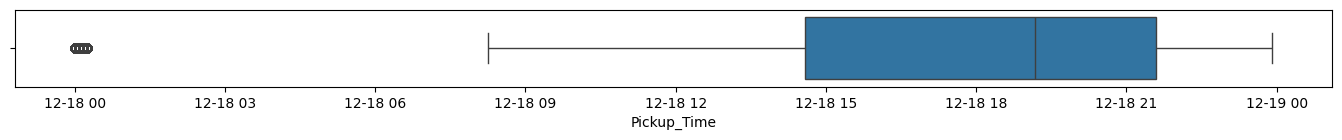

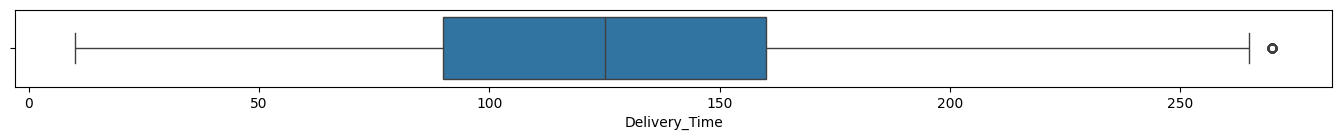

In [12]:
df=df.select_dtypes(exclude=['object'])
for column in df:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=df,x=column)

Removing outliers 

In [36]:

df['z_score'] = (df['Delivery_Time'] - df['Delivery_Time'].mean()) / df['Delivery_Time'].std()
threshold = 2
df = df[df['z_score'].abs() <= threshold]
df= df.drop(columns= ["z_score"])

## Stastical Analysis

Finding correlation using corr() 

In [15]:
print(df.corr(numeric_only = True))

               Agent_Age  Agent_Rating  Delivery_Time
Agent_Age       1.000000     -0.119996       0.239941
Agent_Rating   -0.119996      1.000000      -0.318748
Delivery_Time   0.239941     -0.318748       1.000000


Finding covarience using cov() 

In [17]:
print(df.cov(numeric_only = True))

               Agent_Age  Agent_Rating  Delivery_Time
Agent_Age      33.256517     -0.217516      63.563314
Agent_Rating   -0.217516      0.098804      -4.602542
Delivery_Time  63.563314     -4.602542    2110.214507


Doing the all other statistical functions

In [18]:
print(df.describe())

          Agent_Age  Agent_Rating                     Order_Date  \
count  41289.000000  41289.000000                          41289   
mean      29.505340      4.636320  2022-03-13 15:49:19.674489856   
min       20.000000      2.500000            2022-02-11 00:00:00   
25%       25.000000      4.500000            2022-03-04 00:00:00   
50%       29.000000      4.700000            2022-03-15 00:00:00   
75%       35.000000      4.900000            2022-03-27 00:00:00   
max       39.000000      5.000000            2022-04-06 00:00:00   
std        5.766846      0.314331                            NaN   

                          Order_Time                    Pickup_Time  \
count                          41289                          41289   
mean   2024-12-18 17:52:58.950810112  2024-12-18 17:35:02.368669440   
min              2024-12-18 00:00:00            2024-12-18 00:00:00   
25%              2024-12-18 15:15:00            2024-12-18 14:25:00   
50%              2024-12-18 19:1

### 1. what are the most popular catogeries of orders?

Category
Electronics     2760
Books           2719
Jewelry         2702
Skincare        2671
Toys            2665
Snacks          2655
Outdoors        2641
Sports          2636
Apparel         2624
Home            2589
Pet Supplies    2587
Kitchen         2578
Cosmetics       2577
Shoes           2567
Clothing        2560
Grocery         1776
Name: count, dtype: int64


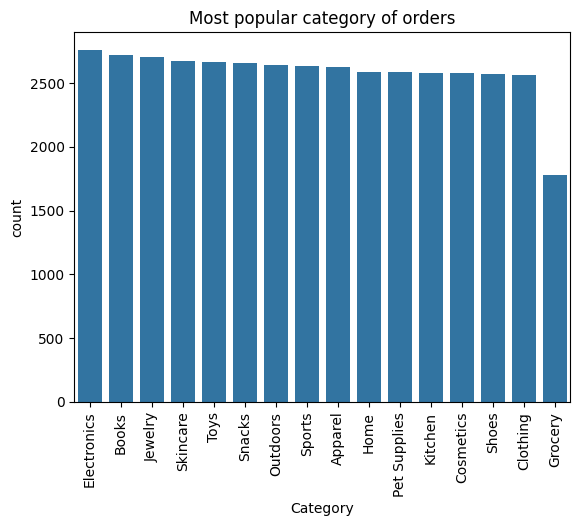

In [39]:
pop_categories= df["Category"].value_counts()
print(pop_categories)
sns.barplot(pop_categories)
plt.title("Most popular category of orders")
plt.xticks(rotation=90)
plt.show()

### 2. What is the average Delivery Time?

In [40]:
avg_del=df["Delivery_Time"].mean()
print(avg_del)

123.34824605998983


### 3. how do differnt weather condition affect delivery time?

Weather
Cloudy        134.455466
Fog           133.615019
Sandstorms    122.517326
Stormy        122.384637
Sunny         104.163125
Windy         122.451944
Name: Delivery_Time, dtype: float64


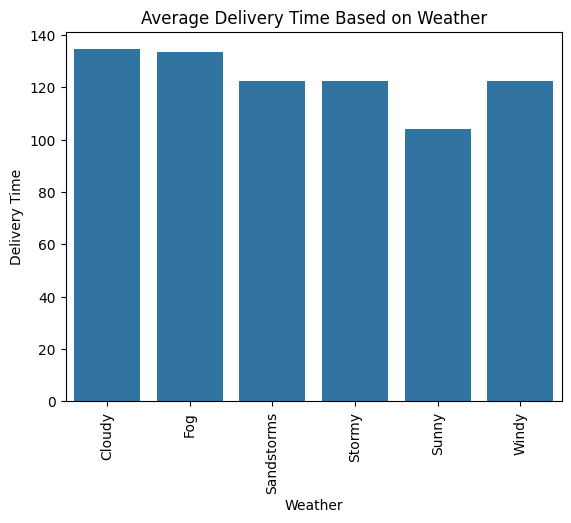

In [41]:
weather_grpd= df.groupby("Weather")["Delivery_Time"].mean()
print(weather_grpd)
sns.barplot(weather_grpd)
plt.xticks(rotation=90)
plt.title("Average Delivery Time Based on Weather")
plt.xlabel("Weather")
plt.ylabel("Delivery Time")
plt.show()

### 4. What is the distribution of delivery vehicle?

Vehicle
motorcycle     23819
scooter        14099
van             3389
Name: count, dtype: int64


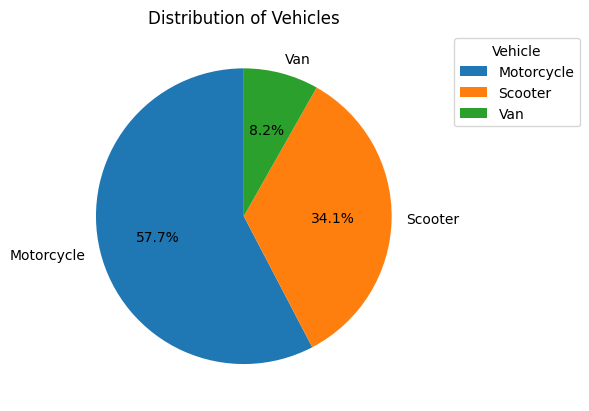

In [42]:
veh = df["Vehicle"].value_counts()
print(veh) 
my_labels = ["Motorcycle", "Scooter", "Van"]
plt.pie(veh,autopct='%1.1f%%', labels = my_labels, startangle = 90)
plt.title("Distribution of Vehicles")
plt.legend(title = "Vehicle", bbox_to_anchor=(1.05,1))

### 5. Does the vehicle affect the delivery time?

Vehicle
motorcycle     127.366766
scooter        117.785162
van            118.248451
Name: Delivery_Time, dtype: float64


<Axes: xlabel='Vehicle', ylabel='Delivery_Time'>

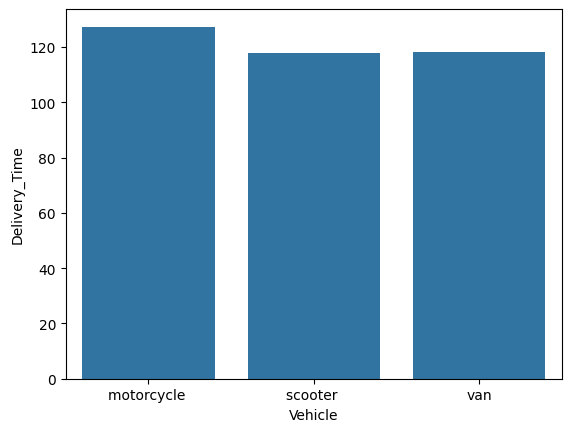

In [43]:
veh_grp = df.groupby("Vehicle")
veh_avg_time = veh_grp["Delivery_Time"].mean()
print(veh_avg_time)
sns.barplot(veh_avg_time)

### 6. What is the most deliveried area?

Area
Metropolitian     30925
Urban              9283
Other              1088
Semi-Urban           11
Name: count, dtype: int64


<Axes: xlabel='Area', ylabel='count'>

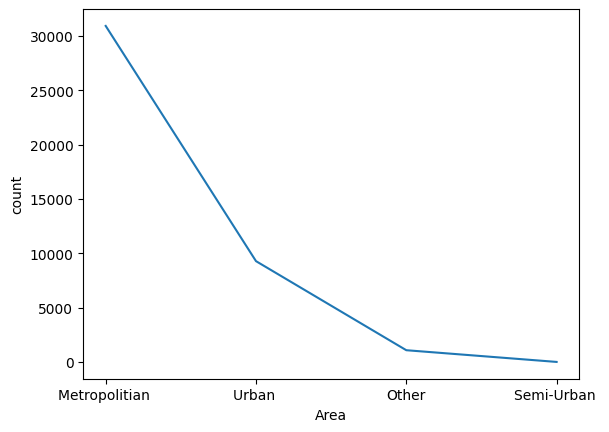

In [44]:
most_area = df["Area"].value_counts()
print(most_area)
sns.lineplot(most_area)

### 7. Does delivery time vary by the area?

Area
Metropolitian     127.899014
Other             106.477941
Semi-Urban         95.454545
Urban             110.198320
Name: Delivery_Time, dtype: float64


<Axes: xlabel='Area', ylabel='Delivery_Time'>

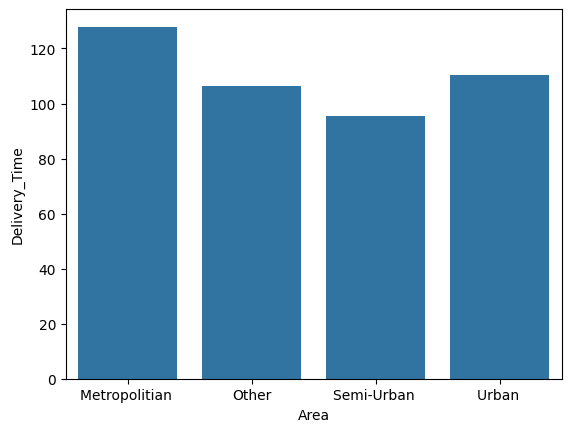

In [45]:
area_grp = df.groupby("Area")
area_time_avg = area_grp["Delivery_Time"].mean()
print(area_time_avg)
sns.barplot(area_time_avg)

### 8. What is the correlation between order time and pickup time?

0.7967937075532818


<Axes: xlabel='Order_Time', ylabel='Pickup_Time'>

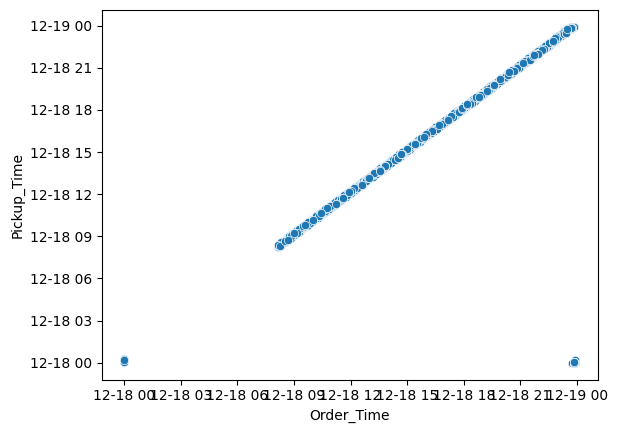

In [46]:
corr1 = df["Order_Time"].corr(df["Pickup_Time"])
print(corr1)
sns.scatterplot(x = "Order_Time", y = "Pickup_Time", data = df)

### 9. How does the traffic affect the delivery time?

Traffic
High       127.332682
Jam        141.250883
Low        104.264728
Medium     126.937177
Name: Delivery_Time, dtype: float64


<Axes: xlabel='Traffic', ylabel='Delivery_Time'>

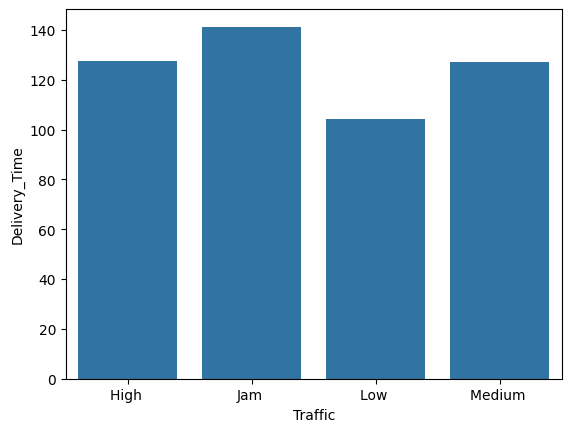

In [47]:
traffi_grp = df.groupby("Traffic")
traffic_time_avg = traffi_grp["Delivery_Time"].mean()
print(traffic_time_avg)
sns.barplot(traffic_time_avg)

### 10. What is the correlation between rating and delivery time?

In [48]:
corr2 = df["Agent_Rating"].corr(df["Delivery_Time"])
print(corr2)

-0.3189117793783795


### 11. What is the correlation between age and rating?

-0.12012179542421568


<Axes: xlabel='Agent_Age', ylabel='Agent_Rating'>

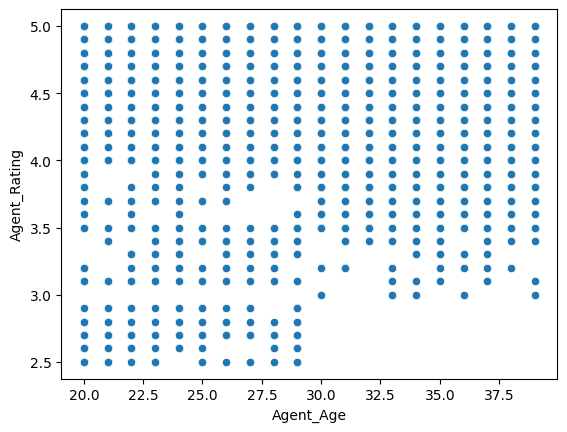

In [49]:
corr3 = df["Agent_Age"].corr(df["Agent_Rating"])
print(corr3)
sns.scatterplot(x = "Agent_Age", y = "Agent_Rating", data = df)

### 12. Most deliveried categories from each area?

Area            Category    
Metropolitian   Electronics     2058
                Books           2000
                Sports          1999
                Jewelry         1996
                Toys            1993
                Apparel         1975
                Skincare        1973
                Outdoors        1960
                Kitchen         1956
                Snacks          1956
                Shoes           1943
                Pet Supplies    1938
                Cosmetics       1918
                Home            1915
                Clothing        1910
                Grocery         1435
Urban           Books            647
                Electronics      632
                Jewelry          630
                Outdoors         623
                Snacks           623
                Skincare         622
                Home             608
                Cosmetics        592
                Toys             590
                Apparel          589
         

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Toys'),
  Text(1, 0, 'Kitchen'),
  Text(2, 0, 'Snacks'),
  Text(3, 0, 'Jewelry'),
  Text(4, 0, 'Sports'),
  Text(5, 0, 'Skincare'),
  Text(6, 0, 'Books'),
  Text(7, 0, 'Electronics'),
  Text(8, 0, 'Pet Supplies'),
  Text(9, 0, 'Clothing'),
  Text(10, 0, 'Cosmetics'),
  Text(11, 0, 'Home'),
  Text(12, 0, 'Apparel'),
  Text(13, 0, 'Outdoors'),
  Text(14, 0, 'Shoes'),
  Text(15, 0, 'Grocery')])

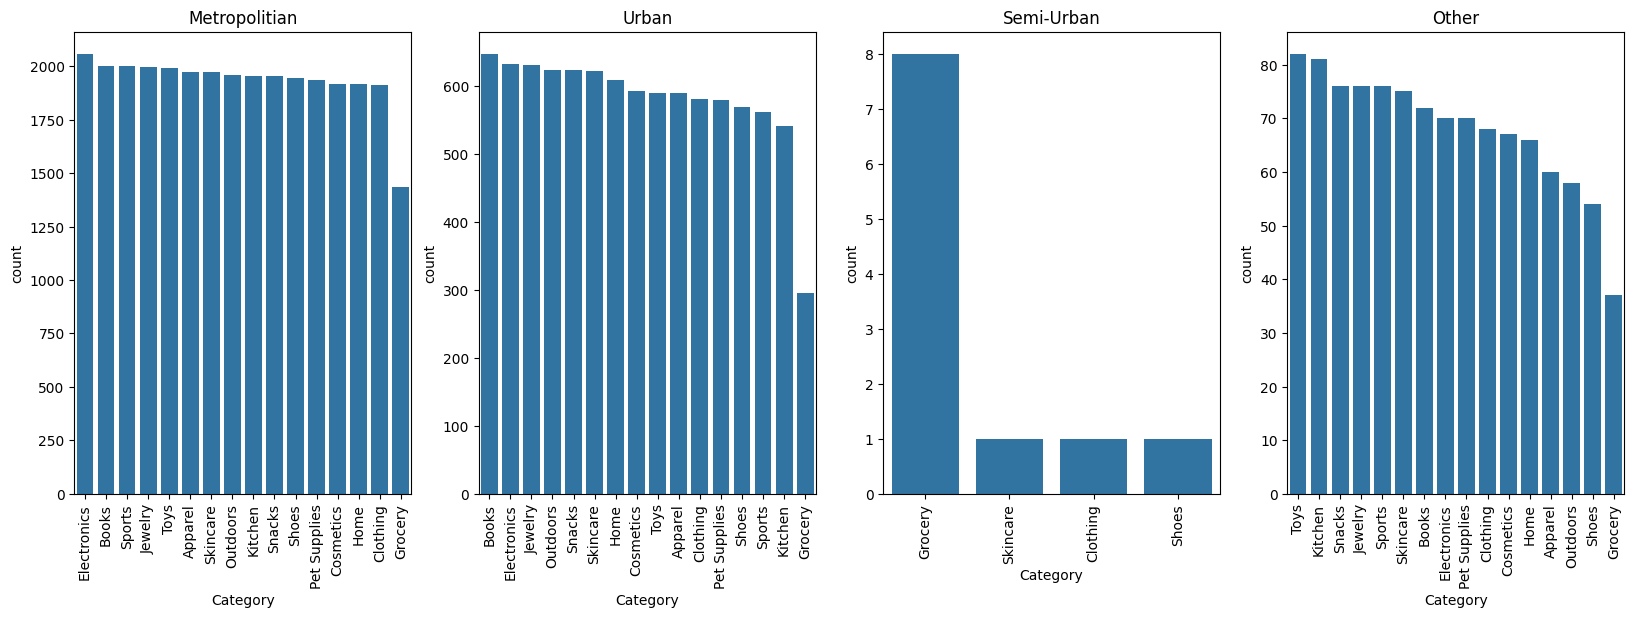

In [50]:
area_cate = area_grp["Category"].value_counts()
srt_area_cate = area_cate.sort_values(ascending = False)
print(srt_area_cate)
metr_area = srt_area_cate.loc["Metropolitian "]
urban_area = srt_area_cate.loc["Urban "]
semi_urban_area = srt_area_cate.loc["Semi-Urban "]
other_area = srt_area_cate.loc["Other"]

plt.figure(figsize = (20,6))

plt.subplot(141)
sns.barplot(metr_area)
plt.title("Metropolitian")
plt.xticks(rotation = 90)

plt.subplot(142)
sns.barplot(urban_area)
plt.title("Urban")
plt.xticks(rotation = 90)

plt.subplot(143)
sns.barplot(semi_urban_area)
plt.title("Semi-Urban")
plt.xticks(rotation = 90)

plt.subplot(144)
sns.barplot(other_area)
plt.title("Other")
plt.xticks(rotation = 90)

### 13. What is the average delivery time vary by category?

Category
Apparel         128.024009
Books           127.232438
Clothing        126.218750
Cosmetics       128.969732
Electronics     127.583333
Grocery          31.698198
Home            127.068366
Jewelry         126.944856
Kitchen         128.634600
Outdoors        127.025748
Pet Supplies    127.294163
Shoes           127.325672
Skincare        128.156121
Snacks          127.418079
Sports          129.262140
Toys            124.876173
Name: Delivery_Time, dtype: float64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Apparel'),
  Text(1, 0, 'Books'),
  Text(2, 0, 'Clothing'),
  Text(3, 0, 'Cosmetics'),
  Text(4, 0, 'Electronics'),
  Text(5, 0, 'Grocery'),
  Text(6, 0, 'Home'),
  Text(7, 0, 'Jewelry'),
  Text(8, 0, 'Kitchen'),
  Text(9, 0, 'Outdoors'),
  Text(10, 0, 'Pet Supplies'),
  Text(11, 0, 'Shoes'),
  Text(12, 0, 'Skincare'),
  Text(13, 0, 'Snacks'),
  Text(14, 0, 'Sports'),
  Text(15, 0, 'Toys')])

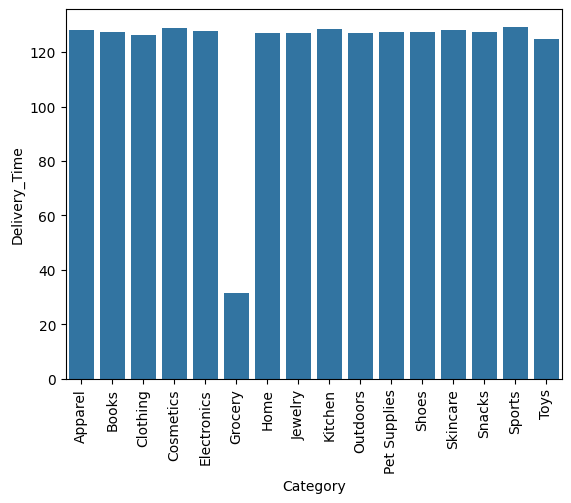

In [51]:
cate_grp = df.groupby("Category")
cate_time_avg = cate_grp["Delivery_Time"].mean()
print(cate_time_avg)
sns.barplot(cate_time_avg)
plt.xticks(rotation = 90)

### 14. What is the most used vehicle in each area?

In [52]:
area_veh = area_grp["Vehicle"].value_counts()
print(area_veh)

Area            Vehicle    
Metropolitian   motorcycle     18079
                scooter        10315
                van             2531
Other           motorcycle       581
                scooter          420
                van               87
Semi-Urban      motorcycle        10
                scooter            1
Urban           motorcycle      5149
                scooter         3363
                van              771
Name: count, dtype: int64


### 15. What is the most common order time?

In [58]:
comm_odr_time = df["Order_Time"].value_counts()
print(comm_odr_time)

Order_Time
2024-12-18 17:55:00    439
2024-12-18 22:20:00    429
2024-12-18 22:10:00    422
2024-12-18 22:45:00    420
2024-12-18 21:55:00    418
                      ... 
2024-12-18 14:30:00     54
2024-12-18 16:00:00     52
2024-12-18 16:30:00     50
2024-12-18 14:15:00     48
2024-12-18 13:20:00     48
Name: count, Length: 176, dtype: int64


### 16. What is the correlation between age and delivery time?

0.2400472808297916


<Axes: xlabel='Agent_Age', ylabel='Delivery_Time'>

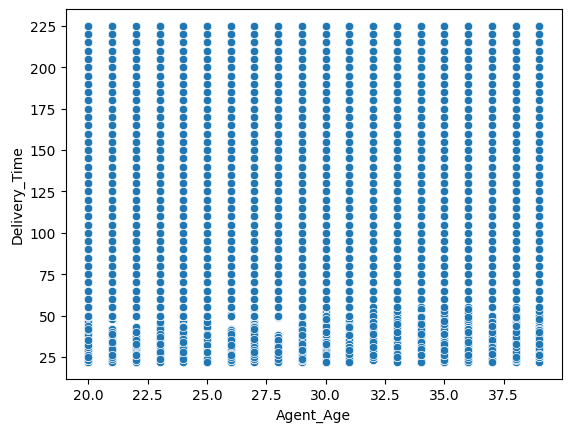

In [56]:
corr4 = df["Agent_Age"].corr(df["Delivery_Time"])
print(corr4)
sns.scatterplot(x = "Agent_Age", y = "Delivery_Time", data = df)

# Summary of Amazon Deliver Analysis
This project analyzes key factors impacting Amazon deliveries, providing insights into delivery patterns, vehicle usage, and environmental effects. Below are the major findings:
## Key Findings:

#### * Order Trends:

* Electronics is the most ordered product category.
*The most common order time is 17:55:00.
#### * Delivery Time Insights:

* The average delivery time across all deliveries is 123.34 minutes.
* Grocery has the lowest average delivery time among all categories.
* When weather conditions are bad, delivery times increase.
* High traffic conditions result in longer delivery times.
#### * Vehicle Usage:

* Motorcycles are the most frequently used vehicles for deliveries.
* Motorcycles have the highest average delivery time, while vans have the lowest.
#### * Geographical Patterns:

* Most orders occur in Metropolitan areas.
* The highest average delivery time is in Metropolitan areas (127.89 minutes), while the lowest is in Semi-Urban areas (95.45 minutes).
* Category preferences vary across regions:
 * Metropolitan: Electronics
 * Urban: Books
 * Semi-Urban: Grocery
 * Other Areas: Toys
#### * Correlations:

* There is a strong positive correlation (0.7968) between Order Time and Pickup Time.
* A moderate negative correlation (-0.3189) exists between Agent Rating and Delivery Time.
* A weak negative correlation (-0.1201) is observed between Agent Age and Agent Rating.
* There is a weak positive correlation (0.2400) between Agent Age and Delivery Time


## Conclusion:

The findings indicate that delivery efficiency is influenced by product categories, vehicle types, environmental conditions, and geographical factors. Traffic and weather have significant impacts on delivery times, while agent performance and ratings show slight correlations with delivery outcomes. Understanding these trends helps optimize delivery operations and improve overall customer satisfaction.
